In [1]:
# TP _ segmentation 
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import dice 
from skimage.filters import threshold_otsu,threshold_local,threshold_li

In [59]:
def dice_coefficient(set1, set2):
    intersection = np.logical_and(set1> 0,set2 >0)
    FP=np.logical_and(set1==0,set2==1)
    FN=np.logical_and(set1==1,set2==0)
    return 2.0 * np.sum(intersection) / (2.0 * np.sum(intersection)+np.sum(FN)+np.sum(FP) )

In [2]:
def dice_(image1,image2):
    image1 = image1.astype(bool)
    image2 = image2.astype(bool)
    dice_coef = 1 - dice(image1.ravel(), image2.ravel())
    return dice_coef


In [3]:
image=io.imread("observation.png")
ground_truth= io.imread("groundtruth.png")

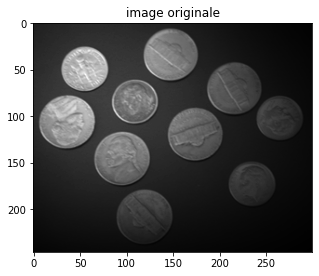

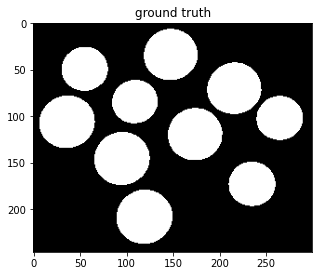

In [4]:
plt.figure(figsize=(5,5))
plt.imshow(image,'gray')
plt.title('image originale')
plt.show()
plt.figure(figsize=(5,5))

plt.imshow(ground_truth,'gray')
plt.title("ground truth")
plt.show()

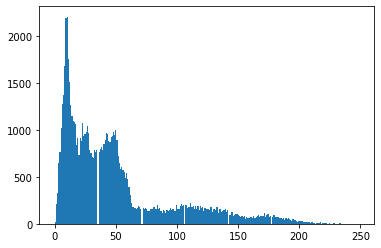

In [5]:
plt.hist(image.ravel(),bins=256)
plt.show()

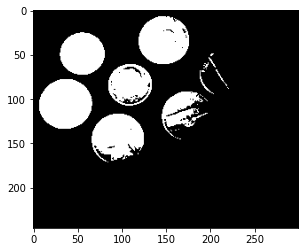

In [6]:
T=95
b=image> T
plt.imshow(b,'gray')
# PAS SUFFISANT PUISQUE LA LUMINOSITE N EST PAS UNIFROME

In [65]:

D=dice_(b,ground_truth)
print("Dice similarity coefficient is ",D)

Dice similarity coefficient is  0.6863841807909605


In [66]:
Otsu=threshold_otsu(image)

binary_otsu=image>Otsu
D2=dice_(binary_otsu,ground_truth)
print("Dice similarity coefficient is ",D2)

Dice similarity coefficient is  0.7642332293704076


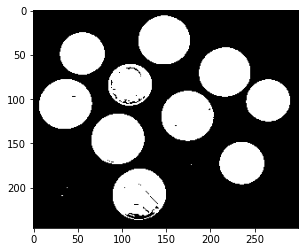

In [67]:
binar=threshold_local(image,block_size=151)
binary_mask=image>binar
plt.imshow(binary_mask,"gray")
plt.show()

In [68]:
D3=dice_(binary_mask,ground_truth)
print("Dice similarity coefficient is ",D3)

Dice similarity coefficient is  0.9890671342902297


In [69]:
Intensities=[x for x in range(1,256)]
DICE=[]
for T in Intensities :
    binar=threshold_local(image,block_size=T)

    DC= image > binar
    v=dice_(DC,ground_truth)
    DICE.append(v)

def index(F,i):
    for k in range(len(F)):

        if  F[k]==i:
            return k
    return 0
seuil=index(DICE,max(DICE))
print(f"seuil is {seuil} and dice coefficient is {max(DICE)} ")

seuil is 59 and dice coefficient is 0.8389484122185407 


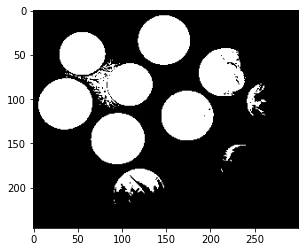

In [70]:
plt.imshow((image>seuil),'gray')
plt.show()



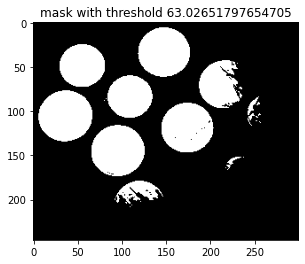

In [51]:
Li_thresholding=threshold_li(image)
binary_li=image>Li_thresholding
plt.imshow(binary_li,'gray')
plt.title(f'mask with threshold {Li_thresholding}')
plt.show()


In [56]:
truth_li=dice_(binary_li,ground_truth)

print('dice coefficient fro Li is',truth_li)

dice coefficient fro Li is 0.8313422868590933


In [97]:
block_size_=[2*x +1 for x in range(0,(image.shape[0]//2))]
DICE=[]
bb=[]
for T in block_size_ :
    if T %2 == 0:
        T=T-1
    binar=threshold_local(image,block_size=T)
    bb.append(binar)
    DC= image > binar
    v=dice_(DC,ground_truth)
    DICE.append(v)



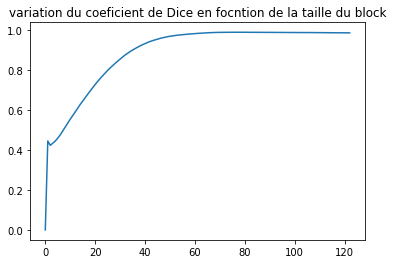

In [98]:
plt.plot(DICE)
plt.title('variation du coeficient de Dice en focntion de la taille du block')
plt.show()

In [103]:
block_size_=[2*x +1 for x in range(0,(image.shape[0]//2))]
DICE=[]
for T in block_size_ :
    if T %2 == 0:
        T=T-1
    binar=threshold_local(image,block_size=T)
    DC= image > binar
    v=dice_(DC,ground_truth)
    DICE.append(v)


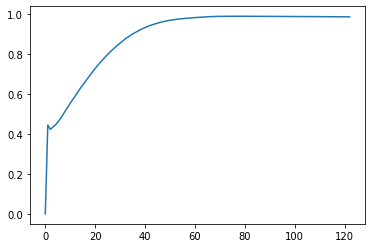

In [104]:
plt.plot(DICE)

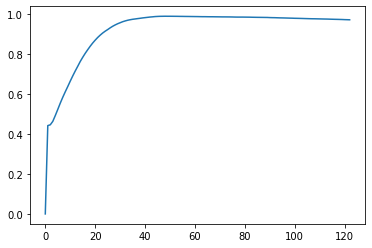

In [101]:
plt.plot(DICE_)

In [144]:
def new_algo(image, window_size):

    if image.dtype == np.float64 or image.dtype == np.float32:
        image = (image - np.min(image)) / (np.max(image) - np.min(image))
        image_norm = (image * 2) - 1
    else:
        image_norm = image.astype(np.float32)
        image = (image - np.min(image)) / (np.max(image) - np.min(image))
        image_norm = (image * 2) - 1
    pad_width = window_size // 2
    image_padded = np.pad(image_norm, pad_width, mode='constant')
    mask=np.zeros_like(image_norm,dtype=bool)
    for i in range(image_norm.shape[0]):
        for j in range(image_norm.shape[1]):
            window = image_padded[i:i + window_size, j:j + window_size]
        
            s=threshold_li(window)

            normalized_diff = image_norm[i, j] 
            mask[i, j] = (normalized_diff > s)
    return mask

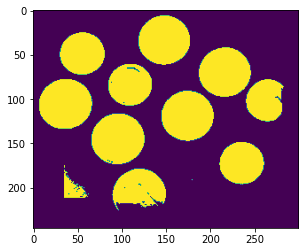

In [150]:
mask=new_algo(image, 70)

plt.imshow(mask)